## Running LAS

In [2]:
import numpy as np
from pyscf import gto, scf, lib, mcscf
import math
import time
import os
from tools import sign_control, util
from tools.util import load_pkl, dump_pkl
from systems.hcircle import HCircle

#Should be able to run on a desktop in ~2-3 min:
NUM_H = 32 #total number of hydrogens
NUM_H_PER_FRAG = 2 #number of hydrogens/fragment
DIST = 1.4 #bond distance

geom = HCircle(DIST,NUM_H,NUM_H_PER_FRAG,fn="logs/hcircle.log")
las = geom.make_las_state_average()

#Build LAS states
print("Initiating LAS Model Space...")
start = time.perf_counter()
las.lasci_()
las.ci = sign_control.fix_sign(las) #sign fixing
stop = time.perf_counter()
print("Done. Time elapsed:",stop-start,"seconds")
las.dump_spaces()

#Run LASSI
print("Running LASSI...")
start = time.perf_counter()
from mrh.my_pyscf import lassi
lsi = lassi.LASSI(las)
energies_lassi, civecs_lassi = lsi.kernel()
civecs_lassi = lsi.get_sivec_vacuum_shuffle(state=0) #sign fixing
stop = time.perf_counter()
print("Done. Time elapsed:",stop-start,"seconds") #Logged to hcircle.log

las_charges = util.las_charges(las)
data = {"energies_lassi":energies_lassi,
        "civecs":civecs_lassi,
        "charges":las_charges,
        "nfrags":geom.nfrags,
        "dist":geom.dist,
        "mf_coeff":geom.mf_coeff,
        "mf_occ":geom.mf_occ,
        "mf_ene":geom.mf_ene,
       }
d = int(DIST*10)
# data_name = f"logs/h{NUM_H}_frag{NUM_H_PER_FRAG}H_dist{d}_lsi"
# dump_pkl(data,f"{data_name}.pkl")

overwrite output file: logs/hcircle.log


WARN: HOMO -0.0983244949178824 >= LUMO -0.0983244949178823


Initiating LAS Model Space...
Done. Time elapsed: 61.789284565951675 seconds
Running LASSI...
Done. Time elapsed: 110.88929386390373 seconds


,LASSI
IP,8.52
EA,-4.00
GAP,12.52


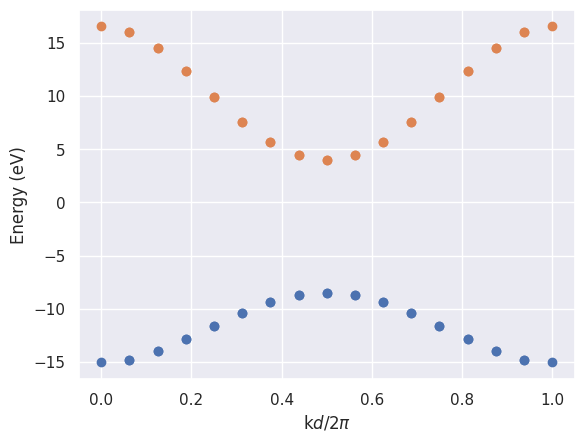

In [3]:
%load_ext autoreload
%autoreload 2

from tools import bandh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tools.util import load_pkl, LASdata
sns.set()

las = LASdata(pkl_fn="logs/h32_frag2H_dist14_lsi.pkl",pct_pdft=0)
df = las.make_bands()
np.round(df,2)